# 必要なライブラリをimprot

In [134]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# fix seed
np.random.seed(0)

# 3D-PCRの変数を定義

In [135]:
sample_size = (12, 8, 10)
lambda_param = 1000
shot_num = 10000

# 評価に必要な定数の定義

In [136]:
res = dict(naive=0, arranged=0, equal=0)
log_naive = []
log_arrangement = []
positive_num = []

# Simulator

In [137]:
def calculate_positive_indices(plates):
    """
    platesの配列から再検査が必要なindexを返す

    Parameters
    ----------
    plates : numpy.ndarray
        各plateのpositive/negatieの情報を持つ配列

    Returns
    -------
    retest_indices : list
        再検査が必要なindexのリスト
    """
    # indices = np.nonzero(plates)
    # positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]

    c_x = np.where(np.any(plates, axis = (1, 2)))[0].tolist()
    c_y = np.where(np.any(plates, axis = (0, 2)))[0].tolist()
    c_z = np.where(np.any(plates, axis = (0, 1)))[0].tolist()
    re_test = list(itertools.product(c_x, c_y, c_z))
    retest_indices = [j + i*sample_size[1] + sample_size[0]*sample_size[1]*k for i, j, k in re_test]

    # return (c_x, c_y, c_z), retest_indices
    return len(retest_indices)

## Case-1

In [138]:
result_1_low = []
result_1_med = []
result_1_high = []
cases = [1, 5, 12]

for data_density in range(len(cases)):
    for _ in range(shot_num):
        positive_index = np.random.randint(0, 960, cases[data_density])
        positive_index = np.unravel_index(positive_index, (12, 8, 10))
        
        plates = np.zeros(sample_size)
        plates[positive_index] = 1
        
        if data_density == 0:
            result_1_low.append(calculate_positive_indices(plates))
        elif data_density == 1:
            result_1_med.append(calculate_positive_indices(plates))
        elif data_density == 2:
            result_1_high.append(calculate_positive_indices(plates))

In [141]:
# result_1_high

In [144]:
mean_low, mean_med, mean_high

(1.0, 67.7608, 357.9099)

<BarContainer object of 1 artists>

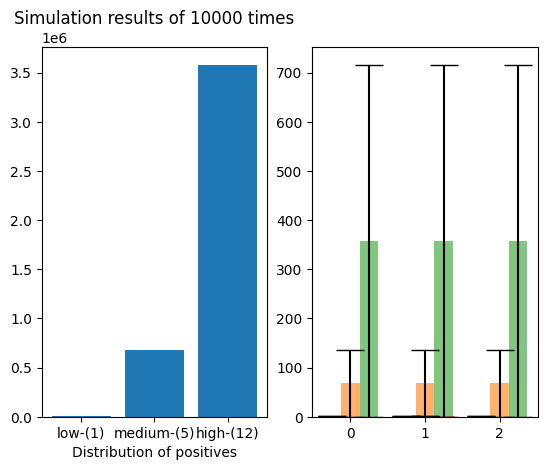

In [142]:
fig = plt.figure()
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.bar([0, 1, 2], [sum(result_1_low), sum(result_1_med), sum(result_1_high)], label=['hoge', 'hoge', 'hoge'])
ax_1.set_xlabel('Distribution of positives')
ticks_location = [0, 1, 2]  # この位置に目盛りを設定
labels = [f'low-({cases[0]})', f'medium-({cases[1]})', f'high-({cases[2]})']   # このラベルを表示
ax_1.set_xticks(ticks_location)
ax_1.set_xticklabels(labels)
ax_1.set_title(f'Simulation results of {shot_num} times')


ax_2 = fig.add_subplot(1, 2, 2)

mean_low = np.mean(result_1_low)
std_dev_low = np.std(result_1_low)
mean_med = np.mean(result_1_med)
std_dev_med = np.mean(result_1_med)
mean_high = np.mean(result_1_high)
std_dev_high = np.mean(result_1_high)

bar_width = 0.25
positions = np.arange(3)
ax_2.bar(positions - bar_width, mean_low, bar_width, yerr=std_dev_low, align='center', alpha=0.6, ecolor='black', capsize=10, label='low')
ax_2.bar(positions, mean_med, bar_width, yerr=std_dev_med, align='center', alpha=0.6, ecolor='black', capsize=10, label='med')
ax_2.bar(positions + bar_width, mean_high, bar_width, yerr=std_dev_high, align='center', alpha=0.6, ecolor='black', capsize=10, label='high')


ax_2.bar(1, mean, yerr=std_dev, align='center', alpha=0.6, ecolor='black', capsize=10)

## case-2

### pの分布を調べる

In [60]:
# data_density = 2
# positive_index = np.random.randint(0, 960, cases[data_density])
# positive_index = np.unravel_index(positive_index, (12, 8, 10))

# plates = np.zeros(sample_size)
# plates[positive_index] = 1

# pre_probability_layer = np.power(np.random.rand(*sample_size), p)
# # pre_probability_layer = np.ones(sample_size)
# random_matrix = np.random.random(sample_size)
# mask = random_matrix < pre_probability_layer
# pseudo_plates = np.where(mask, plates, 1 - plates)

# pre_probability_list = pre_probability_layer.ravel().tolist()
# psudo_plates_list = pseudo_plates.ravel().tolist()
# plates_list = plates.ravel().tolist()

# pseudo_plates_plates_list = [(psudo_plates_list[i], plates_list[i]) for i in range(len(psudo_plates_list))]
# pseudo_plates_plates_list.sort(key=lambda x: x[0], reverse = True)

# plates_sorted = [pseudo_plates_plates_list[i][1] for i in range(len(pseudo_plates_plates_list))]
# plates_sorted = np.array(plates_sorted).reshape(10, 8, 12).transpose(2, 1, 0)
# # plates_sorted

10000 10000
680447 50210
3599918 156659


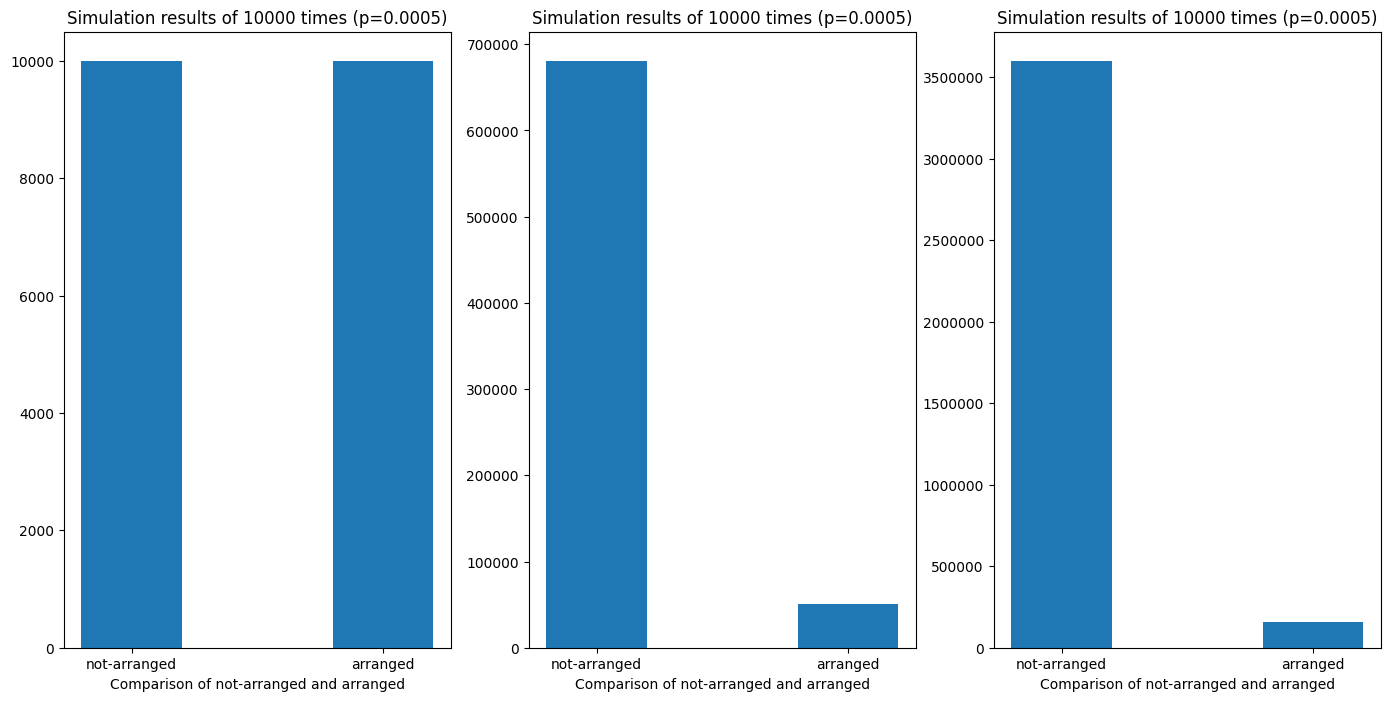

In [59]:
result_2_pure = [] # densityごとに区切っている
result_2_arranged = []
cases = [1, 5, 12]
p = 0.0005

for data_density in range(len(cases)):
    temp_pure = []
    temp_arranged = []
    for _ in range(shot_num):
        # positive_index = np.random.randint(0, 960, size=cases[data_density])
        positive_index = np.random.choice(960, cases[data_density], replace=False)
        
        # print('a', len(positive_index)) if len(positive_index) != cases[data_density] else None, ok
        
        positive_index = np.unravel_index(positive_index, (12, 8, 10))

        # print(len(positive_index)) if len(positive_index) != 3 else None, ok
        # print('a', len(positive_index)) if len(positive_index) != cases[data_density] else None, ok
        
        plates = np.zeros(sample_size)
        plates[positive_index] = 1

        # print(len(np.nonzero(plates)[0]), positive_index) if len(np.nonzero(plates)[0]) != cases[data_density] else None, ok
              
        temp_pure.append(calculate_positive_indices(plates))
        # print(temp_pure[-1]) if cases[data_density] == 1 and temp_pure[-1] != 1 else None, ok
        
        pre_probability_layer = np.power(np.random.rand(*sample_size), p)
        random_matrix = np.random.random(sample_size)
        mask = random_matrix < pre_probability_layer
        pseudo_plates = np.where(mask, plates, 1 - plates)

        pre_probability_list = pre_probability_layer.ravel().tolist()
        psudo_plates_list = pseudo_plates.ravel().tolist()
        plates_list = plates.ravel().tolist()

        # print(sum(plates_list)) if sum(plates_list) != cases[data_density] else None, ok
        
        pseudo_plates_plates_list = [(psudo_plates_list[i], plates_list[i]) for i in range(len(psudo_plates_list))]
        pseudo_plates_plates_list.sort(key=lambda x: x[0], reverse = True)

        plates_sorted = [pseudo_plates_plates_list[i][1] for i in range(len(pseudo_plates_plates_list))]
        
        # print(sum(plates_sorted)) if sum(plates_sorted) != cases[data_density] else None, ok
        
        plates_sorted = np.array(plates_sorted).reshape(10, 8, 12).transpose(2, 1, 0)
        
        print(len(np.nonzero(plates_sorted)[0])) if len(np.nonzero(plates_sorted)[0]) != cases[data_density] else None
        # check upper bound and lower bound
        print('a', len(np.nonzero(plates_sorted)[0])) if not(cases[data_density] <= calculate_positive_indices(plates_sorted) <= min(cases[data_density], 12) * min(cases[data_density], 8), min(cases[data_density], 10)) else None
        
        temp_arranged.append(calculate_positive_indices(plates_sorted))

    result_2_pure.append(temp_pure)
    result_2_arranged.append(temp_arranged)

# visualize
fig = plt.figure(figsize=(17, 8))

for i in range(len(result_2_pure)):
    ax = fig.add_subplot(1, 3, i+1)

    ax.bar([0, 2], [sum(result_2_pure[i]), sum(result_2_arranged[i])])
    print(sum(result_2_pure[i]), sum(result_2_arranged[i]))
    ax.set_xlabel('Comparison of not-arranged and arranged')

    ticks_location = [0, 2]  # この位置に目盛りを設定
    labels = ['not-arranged', 'arranged']   # このラベルを表示

    ax.set_xticks(ticks_location)
    ax.set_xticklabels(labels)
    ax.set_title(f'Simulation results of {shot_num} times (p={p})')

    ax.ticklabel_format(style='plain',axis='y')
fig.show()

## case-3

(array([  2.,   2.,   3.,   0.,   7.,   5.,   4.,  11.,  14.,  17.,  28.,
         32.,  41.,  52.,  65.,  73., 109., 128., 143., 163., 195., 206.,
        258., 276., 316., 343., 379., 382., 418., 432., 463., 457., 421.,
        416., 415., 425., 410., 331., 348., 338., 270., 245., 222., 199.,
        156., 166., 116.,  95.,  93.,  62.]),
 array([0.44611707, 0.45718533, 0.46825358, 0.47932184, 0.4903901 ,
        0.50145835, 0.51252661, 0.52359487, 0.53466312, 0.54573138,
        0.55679964, 0.56786789, 0.57893615, 0.59000441, 0.60107266,
        0.61214092, 0.62320918, 0.63427743, 0.64534569, 0.65641395,
        0.6674822 , 0.67855046, 0.68961871, 0.70068697, 0.71175523,
        0.72282348, 0.73389174, 0.74496   , 0.75602825, 0.76709651,
        0.77816477, 0.78923302, 0.80030128, 0.81136954, 0.82243779,
        0.83350605, 0.84457431, 0.85564256, 0.86671082, 0.87777908,
        0.88884733, 0.89991559, 0.91098385, 0.9220521 , 0.93312036,
        0.94418861, 0.95525687, 0.96632513, 0.

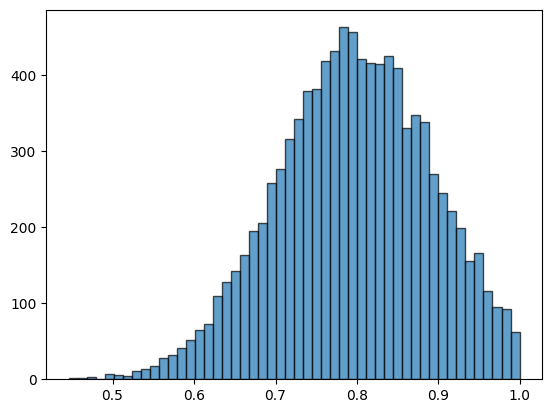

In [133]:
mean = 0.8
std_dev = 0.1
samples = np.random.normal(mean, std_dev, shot_num)
samples = samples[(samples >= 0) & (samples <= 1)]
final_array = samples[:12*8*10].reshape((12, 8, 10))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(samples, bins=50, edgecolor='black', alpha=0.7)

In [124]:
# p_list = [0.0005, 0.005, 0.05, 0.5]


# fig = plt.figure(figsize=(15, 7))
# for i in range(len(p_list)):
#     pre_probability_layer = np.power(np.random.rand(shot_num), p_list[i])
#     ax = fig.add_subplot(1, len(p_list), i+1)
#     ax.hist(pre_probability_layer, bins=50)
#     ax.set_xlim(0, 1)
#     ax.set_xlabel(f'p={p_list[i]}')
#     ax.set_ylabel('freq')
# fig.show()

In [127]:
result_3_pure = []
result_3_arranged = []

data_density = 1
cases = [1, 5, 12]

pre_probability_layer_list = [np.power(np.random.rand(*sample_size), p_list[i]) for i in range(len(p_list))] + [final_array]


for i in range(len(pre_probability_layer_list)):
    temp_pure = []
    temp_arranged = []
    for _ in range(shot_num):
        positive_index = np.random.choice(960, cases[data_density], replace=False)
        
        # print('a', len(positive_index)) if len(positive_index) != cases[data_density] else None, ok
        
        positive_index = np.unravel_index(positive_index, (12, 8, 10))

        # print(len(positive_index)) if len(positive_index) != 3 else None, ok
        # print('a', len(positive_index)) if len(positive_index) != cases[data_density] else None, ok
        
        plates = np.zeros(sample_size)
        plates[positive_index] = 1

        # print(len(np.nonzero(plates)[0]), positive_index) if len(np.nonzero(plates)[0]) != cases[data_density] else None, ok

        # print(temp_pure[-1]) if cases[data_density] == 1 and temp_pure[-1] != 1 else None, ok
        
        pre_probability_layer = pre_probability_layer_list[i]
        random_matrix = np.random.random(sample_size)
        mask = random_matrix < pre_probability_layer
        pseudo_plates = np.where(mask, plates, 1 - plates)

        pre_probability_list = pre_probability_layer.ravel().tolist()
        psudo_plates_list = pseudo_plates.ravel().tolist()
        plates_list = plates.ravel().tolist()

        # print(sum(plates_list)) if sum(plates_list) != cases[data_density] else None, ok
        
        pseudo_plates_plates_list = [(psudo_plates_list[i], plates_list[i]) for i in range(len(psudo_plates_list))]
        pseudo_plates_plates_list.sort(key=lambda x: x[0], reverse = True)

        plates_sorted = [pseudo_plates_plates_list[i][1] for i in range(len(pseudo_plates_plates_list))]
        
        # print(sum(plates_sorted)) if sum(plates_sorted) != cases[data_density] else None, ok
        
        plates_sorted = np.array(plates_sorted).reshape(10, 8, 12).transpose(2, 1, 0)
        
        print(len(np.nonzero(plates_sorted)[0])) if len(np.nonzero(plates_sorted)[0]) != cases[data_density] else None
        # check upper bound and lower bound
        print('a', len(np.nonzero(plates_sorted)[0])) if not(cases[data_density] <= calculate_positive_indices(plates_sorted) <= min(cases[data_density], 12) * min(cases[data_density], 8), min(cases[data_density], 10)) else None
        
        # if i == 0:
        #     result_3_low_pure.append(res_pure)
        #     result_3_low_arranged.append(res_arranged)
        # elif i == 1:
        #     result_3_med_pure.append(res_pure)
        #     result_3_med_arranged.append(res_arranged)
        # elif i == 2:
        #     result_3_high_pure.append(res_pure)
        #     result_3_high_arranged.append(res_arranged)

        temp_pure.append(calculate_positive_indices(plates))
        temp_arranged.append(calculate_positive_indices(plates_sorted))

    result_3_pure.append(temp_pure)
    result_3_arranged.append(temp_arranged)
# result_3_pure = [result_3_low_pure, result_3_med_pure, result_3_high_pure]
# result_3_arranged = [result_3_low_arranged, result_3_med_arranged, result_3_high_arranged]

680637 50195
677728 55222
681919 176678
675672 636285
681692 483662


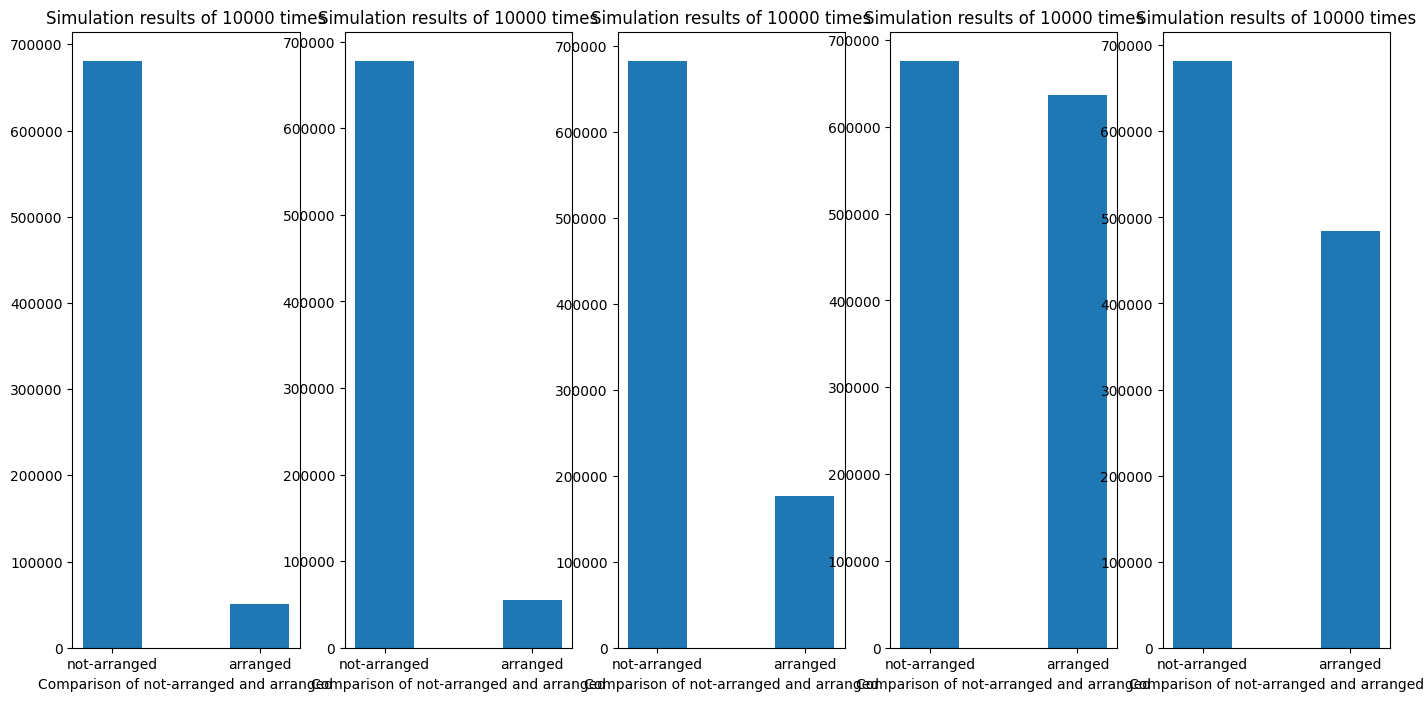

In [129]:
fig = plt.figure(figsize=(17, 8))

for i in range(len(pre_probability_layer_list)):
    ax = fig.add_subplot(1, len(pre_probability_layer_list), i+1)
    ax.bar([0, 2], [sum(result_3_pure[i]), sum(result_3_arranged[i])])
    print(sum(result_3_pure[i]), sum(result_3_arranged[i]))
    ax.set_xlabel('Comparison of not-arranged and arranged')
    ticks_location = [0, 2]  # この位置に目盛りを設定
    labels = ['not-arranged', 'arranged']   # このラベルを表示

    ax.set_xticks(ticks_location)
    ax.set_xticklabels(labels)
    ax.set_title(f'Simulation results of {shot_num} times')

    ax.ticklabel_format(style='plain',axis='y')
fig.show()